In [34]:
import os
sys.path.append("C:\\Users\\Andrew\\OneDrive - University College London\\_PhD\\Papers - Drafts\\J5_JASA_Lockdown-SS")

import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.set_context("paper", font_scale=1.4)

from scripts import lockdown_mlm as mlm

# Define some constants and options
## variables
dep_vars = ["Natural", "Traffic", "Human", "Other", "loudness", "overall", "Pleasant", "Eventful"]

FEATS_LISTS = mlm.FEATS_LISTS
remove = ["FS_TEMP", "LAeq_TEMP", "LCeq_TEMP", "LZeq_TEMP", "I_TEMP", "N_TEMP", "R_TEMP", "S_TEMP", "SIL_TEMP", "THD_TEMP", "T_TEMP"]

for k in remove:
    FEATS_LISTS.pop(k, None)

acoustic_vars = sorted({x for v in FEATS_LISTS.values() for x in v})

# ##################################################################
# Load Data

DATA_DIR = Path("C:/Users/Andrew/OneDrive - University College London/_PhD/Papers - Drafts/J5_JASA_Lockdown-SS/data")
RESULTS_DIR = Path("C:/Users/Andrew/OneDrive - University College London/_PhD/Papers - Drafts/J5_JASA_Lockdown-SS/results")

ssidData = pd.read_csv(DATA_DIR.joinpath("2020-08-13/LondonVeniceBINResults_2020-08-13_4.csv"))
prelockdownData = pd.read_csv(RESULTS_DIR.joinpath("2020-09-08/prelockdownData-R-Predict_3.csv"))
lockdownData = pd.read_csv(RESULTS_DIR.joinpath("2020-09-08/lockdownData-R-Predict_3.csv"))

ordered_locations = sorted(set(prelockdownData.LocationID))


## Combining data into one dataframe

In [35]:
combinedData = pd.concat([prelockdownData, lockdownData])
combinedData.loc[combinedData.Lockdown==2, 'Pleasant'] = combinedData.loc[combinedData.Lockdown==2, 'Pleasant_pred']
combinedData.loc[combinedData.Lockdown==2, 'Eventful'] = combinedData.loc[combinedData.Lockdown==2, 'Eventful_pred']
combinedData.loc[combinedData.Lockdown==2, 'Natural'] = combinedData.loc[combinedData.Lockdown==2, 'Natural_pred']
combinedData.loc[combinedData.Lockdown==2, 'Human'] = combinedData.loc[combinedData.Lockdown==2, 'Human_pred']
combinedData.loc[combinedData.Lockdown==2, 'Traffic'] = combinedData.loc[combinedData.Lockdown==2, 'Traffic_pred']
combinedData.loc[combinedData.Lockdown==2, 'Other'] = combinedData.loc[combinedData.Lockdown==2, 'Other_pred']
combinedData.loc[combinedData.Lockdown==2, 'overall'] = combinedData.loc[combinedData.Lockdown==2, 'overall_pred']
combinedData.loc[combinedData.Lockdown==2, 'loudness'] = combinedData.loc[combinedData.Lockdown==2, 'loudness_pred']


### Location means of soundscape assessments Pre Lockdown (==1, Actual) and During Lockdown (==2, Predicted)

In [36]:
prelockdown_summary = prelockdownData[['LocationID', 'Pleasant', 'Eventful', 'Lockdown']].groupby("LocationID").mean()
lockdown_summary = lockdownData[['LocationID', 'Pleasant_pred', 'Eventful_pred', 'Lockdown']].groupby("LocationID").mean()
lockdown_summary = lockdown_summary.rename(columns={
    'Pleasant_pred': 'Pleasant', 
    'Eventful_pred': 'Eventful', 
    })
summaries = pd.concat([prelockdown_summary, lockdown_summary])
summaries['LocationID'] = summaries.index.values
summaries

,Pleasant,Eventful,Lockdown,LocationID
LocationID,,,,
CamdenTown,-0.085017,0.389827,1,CamdenTown
EustonTap,-0.212548,0.189456,1,EustonTap
MarchmontGarden,0.267471,-0.045435,1,MarchmontGarden
MonumentoGaribaldi,0.379609,0.057862,1,MonumentoGaribaldi
PancrasLock,0.279305,0.064004,1,PancrasLock
RegentsParkFields,0.466470,-0.040805,1,RegentsParkFields
RegentsParkJapan,0.632678,0.018787,1,RegentsParkJapan
RussellSq,0.489734,0.041965,1,RussellSq
SanMarco,0.187516,0.376335,1,SanMarco


In [37]:
prelockdown_summary['LocationID'] = prelockdown_summary.index.values
prelockdown_summary

,Pleasant,Eventful,Lockdown,LocationID
LocationID,,,,
CamdenTown,-0.085017,0.389827,1,CamdenTown
EustonTap,-0.212548,0.189456,1,EustonTap
MarchmontGarden,0.267471,-0.045435,1,MarchmontGarden
MonumentoGaribaldi,0.379609,0.057862,1,MonumentoGaribaldi
PancrasLock,0.279305,0.064004,1,PancrasLock
RegentsParkFields,0.466470,-0.040805,1,RegentsParkFields
RegentsParkJapan,0.632678,0.018787,1,RegentsParkJapan
RussellSq,0.489734,0.041965,1,RussellSq
SanMarco,0.187516,0.376335,1,SanMarco


In [38]:
lockdown_summary['LocationID'] = lockdown_summary.index.values
lockdown_summary

,Pleasant,Eventful,Lockdown,LocationID
LocationID,,,,
CamdenTown,0.004708,0.224233,2,CamdenTown
EustonTap,-0.088887,0.189614,2,EustonTap
MarchmontGarden,0.336998,-0.114583,2,MarchmontGarden
MonumentoGaribaldi,0.343678,0.175329,2,MonumentoGaribaldi
PancrasLock,0.326378,0.004148,2,PancrasLock
RegentsParkFields,0.490887,-0.128438,2,RegentsParkFields
RegentsParkJapan,0.572912,0.016154,2,RegentsParkJapan
RussellSq,0.373517,0.109402,2,RussellSq
SanMarco,0.413717,-0.168262,2,SanMarco


### Change in circumplex soundscape position during Lockdown

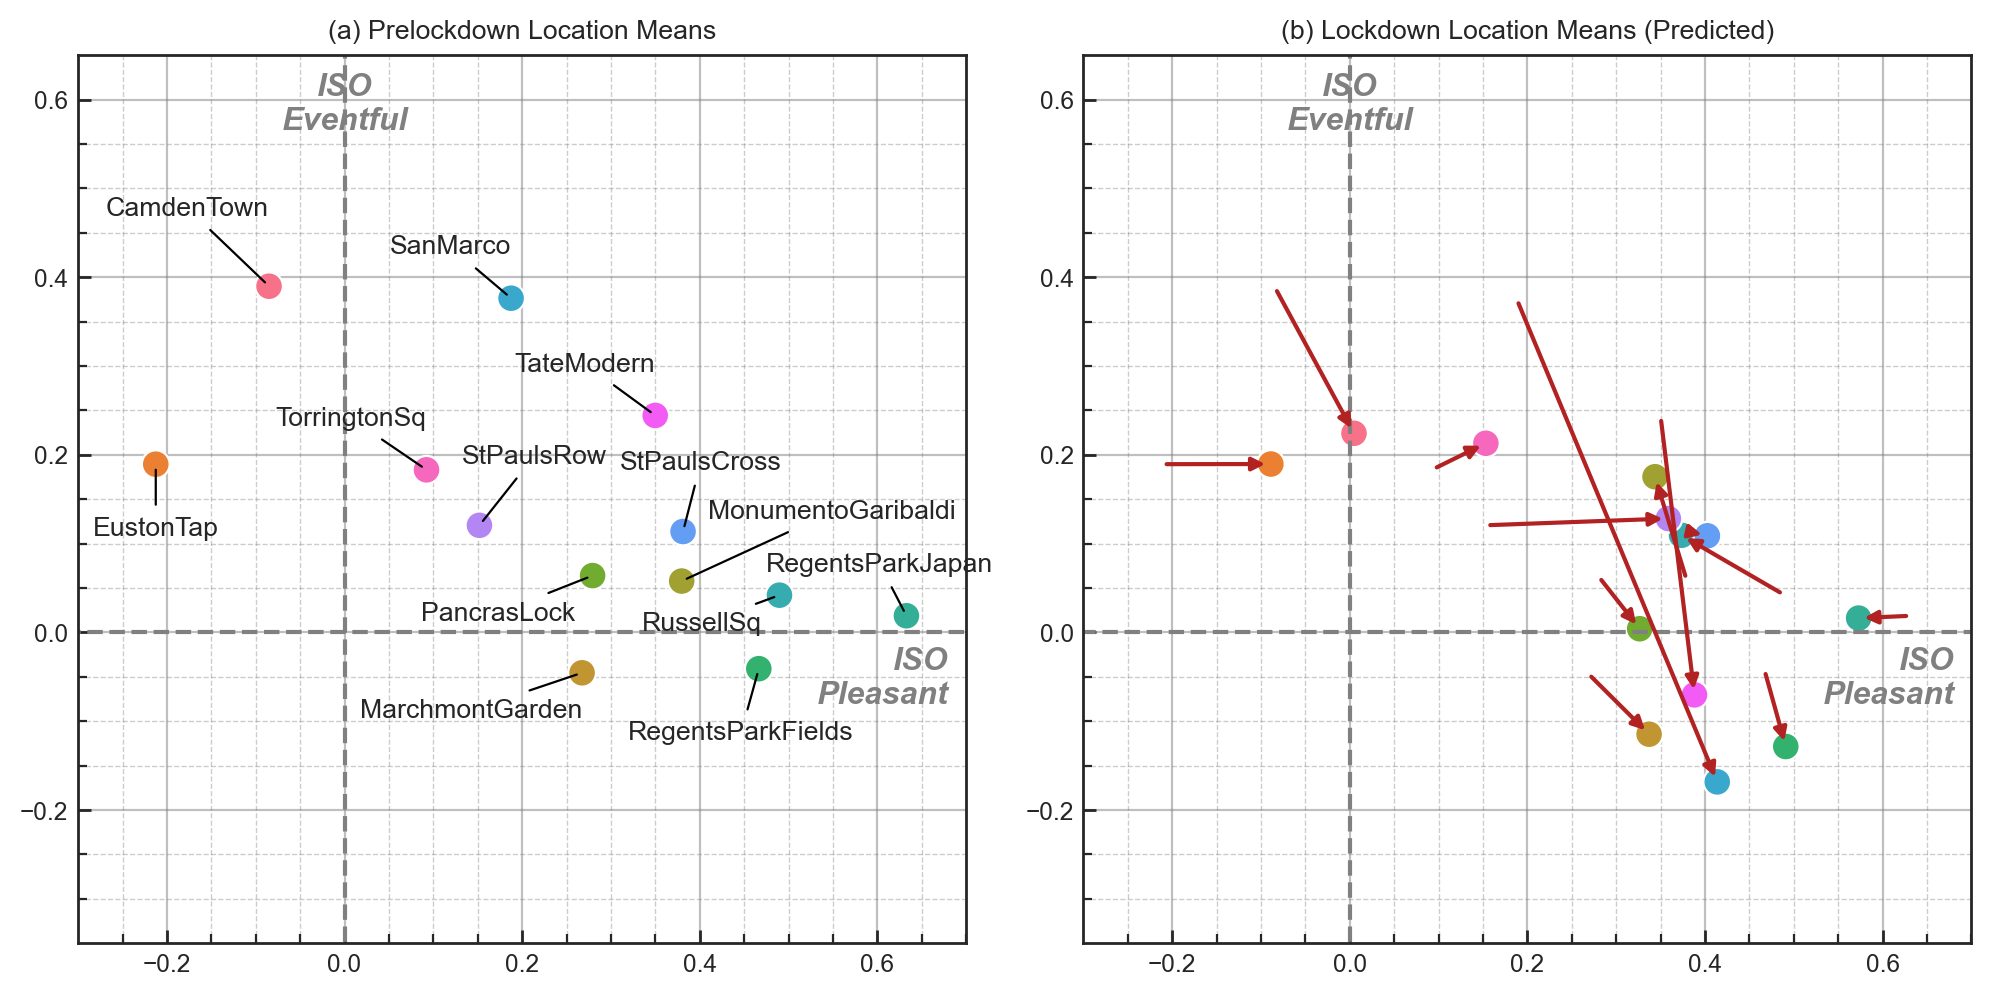

<Figure size 2100x1400 with 0 Axes>

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_palette("Blues")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
fig = plt.figure(figsize=(10, 10))
plt.rcParams['figure.dpi'] = 350 # 200 e.g. is really fine, but slower

line_weights = 1.5

ax_1 = fig.add_subplot(221, aspect="equal", xlim=(-0.3, 0.7), ylim=(-0.35, 0.65))
ax_2 = fig.add_subplot(222, aspect="equal", xlim=(-0.3, 0.7), ylim=(-0.35, 0.65))

ax_1.title.set_text('(a) Prelockdown Location Means')
ax_2.title.set_text('(b) Lockdown Location Means (Predicted)')

sns.scatterplot(
    data=prelockdown_summary,
    x="Pleasant",
    y="Eventful",
    hue="LocationID",
    s=100,
    ax=ax_1,
    legend=False,
    palette=sns.color_palette('husl', 13)
)

sns.scatterplot(
    data=lockdown_summary,
    x="Pleasant",
    y="Eventful",
    hue="LocationID",
    s=100,
    ax=ax_2,
    legend=False,
    palette=sns.color_palette('husl', 13)
)
for i in range(len(lockdown_summary['LocationID'])):
    ax_2.annotate(
        text="",
        xy=(lockdown_summary['Pleasant'][i], lockdown_summary['Eventful'][i]),
        xytext=(prelockdown_summary['Pleasant'][i], prelockdown_summary['Eventful'][i]),
        arrowprops=dict(arrowstyle="-|>", color='firebrick', lw=line_weights),
    )


for axes in (ax_1, ax_2):
    # grids and ticks
    axes.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    axes.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

    axes.grid(b=True, which="major", color="grey", alpha=0.5)
    axes.grid(
        b=True,
        which="minor",
        color="grey",
        linestyle="dashed",
        linewidth=0.5,
        alpha=0.4,
    )

    # hide axis labels
    axes.xaxis.label.set_visible(False)
    axes.yaxis.label.set_visible(False)

    # Add lines and labels for circumplex model
    axes.plot(  # horizontal line
        [-1, 1],
        [0, 0],
        # transform=axes.transAxes,
        linestyle="dashed",
        color="grey",
        alpha=1,
        lw=line_weights
    )
    axes.plot(  # vertical line
        [0, 0],
        [1, -1],
        # transform=axes.transAxes,
        linestyle="dashed",
        color="grey",
        alpha=1,
        lw=line_weights
    )
    fontdict = {
        "fontstyle": "italic",
        "fontsize": "large",
        "fontweight": "bold",
        "c": "grey",
        "alpha": 1,
    }

    axes.text(  # ISO Pleasant label
        x=0.98,
        y=0.27,
        s="ISO\nPleasant",
        ha="right",
        fontdict=fontdict,
        transform=axes.transAxes,
    )
    axes.text(  # ISO Eventful label
        x=0.3,
        y=0.98,
        s="ISO\nEventful",
        ha="center",
        va="top",
        fontdict=fontdict,
        transform=axes.transAxes,
    )


def iso_annotations(axes, loc_idx, x_adj=0, y_adj=0, ha="center"):
    axes.annotate(
        text=prelockdown_summary["LocationID"][loc_idx],
        xy=(prelockdown_summary["Pleasant"][loc_idx], prelockdown_summary["Eventful"][loc_idx]),
        xytext=(
            prelockdown_summary["Pleasant"][loc_idx] + x_adj,
            prelockdown_summary["Eventful"][loc_idx] + y_adj,
        ),
        ha=ha,
        arrowprops=dict(arrowstyle="-", ec="black"),
        annotation_clip=True,
    )

iso_annotations(ax_1, 0, x_adj=-0, y_adj=0.08, ha="right")  # Camden Town
iso_annotations(ax_1, 1, x_adj=-0, y_adj=-0.08, ha="center")  # Euston Tap
iso_annotations(ax_1, 2, x_adj=-0, y_adj=-0.05, ha='right')  # Marchmont Garden
iso_annotations(ax_1, 3, x_adj=0.03, y_adj=0.07, ha="left")  # MonumentoGaribaldi
iso_annotations(ax_1, 4, x_adj=-0.02, y_adj=-0.05, ha="right")  # St Pancras Lock
iso_annotations(ax_1, 5, x_adj=-0.02, y_adj=-0.08, ha="center")  # Regents Park Fields
iso_annotations(ax_1, 6, x_adj=-0.03, y_adj=0.05, ha="center")  # Regents Park Japan
iso_annotations(ax_1, 7, x_adj=-0.02, y_adj=-0.04, ha="right")  # Russell sq
iso_annotations(ax_1, 8, x_adj=-0, y_adj=0.05, ha="right")  # SanMarco
iso_annotations(ax_1, 9, x_adj=0.02, y_adj=0.07, ha='center')  # St Pauls Cross
iso_annotations(ax_1, 10, x_adj=-0.02, y_adj=0.07, ha='left')  # St Pauls Row
iso_annotations(ax_1, 11, x_adj=-0, y_adj=0.05, ha='right')  # Tate Modern
iso_annotations(ax_1, 12, x_adj=-0, y_adj=0.05, ha='right')  # Torrington Sq

plt.tight_layout()
plt.show()
# plt.savefig('Pre-and-post-Lockdown-Circumplex.jpg')


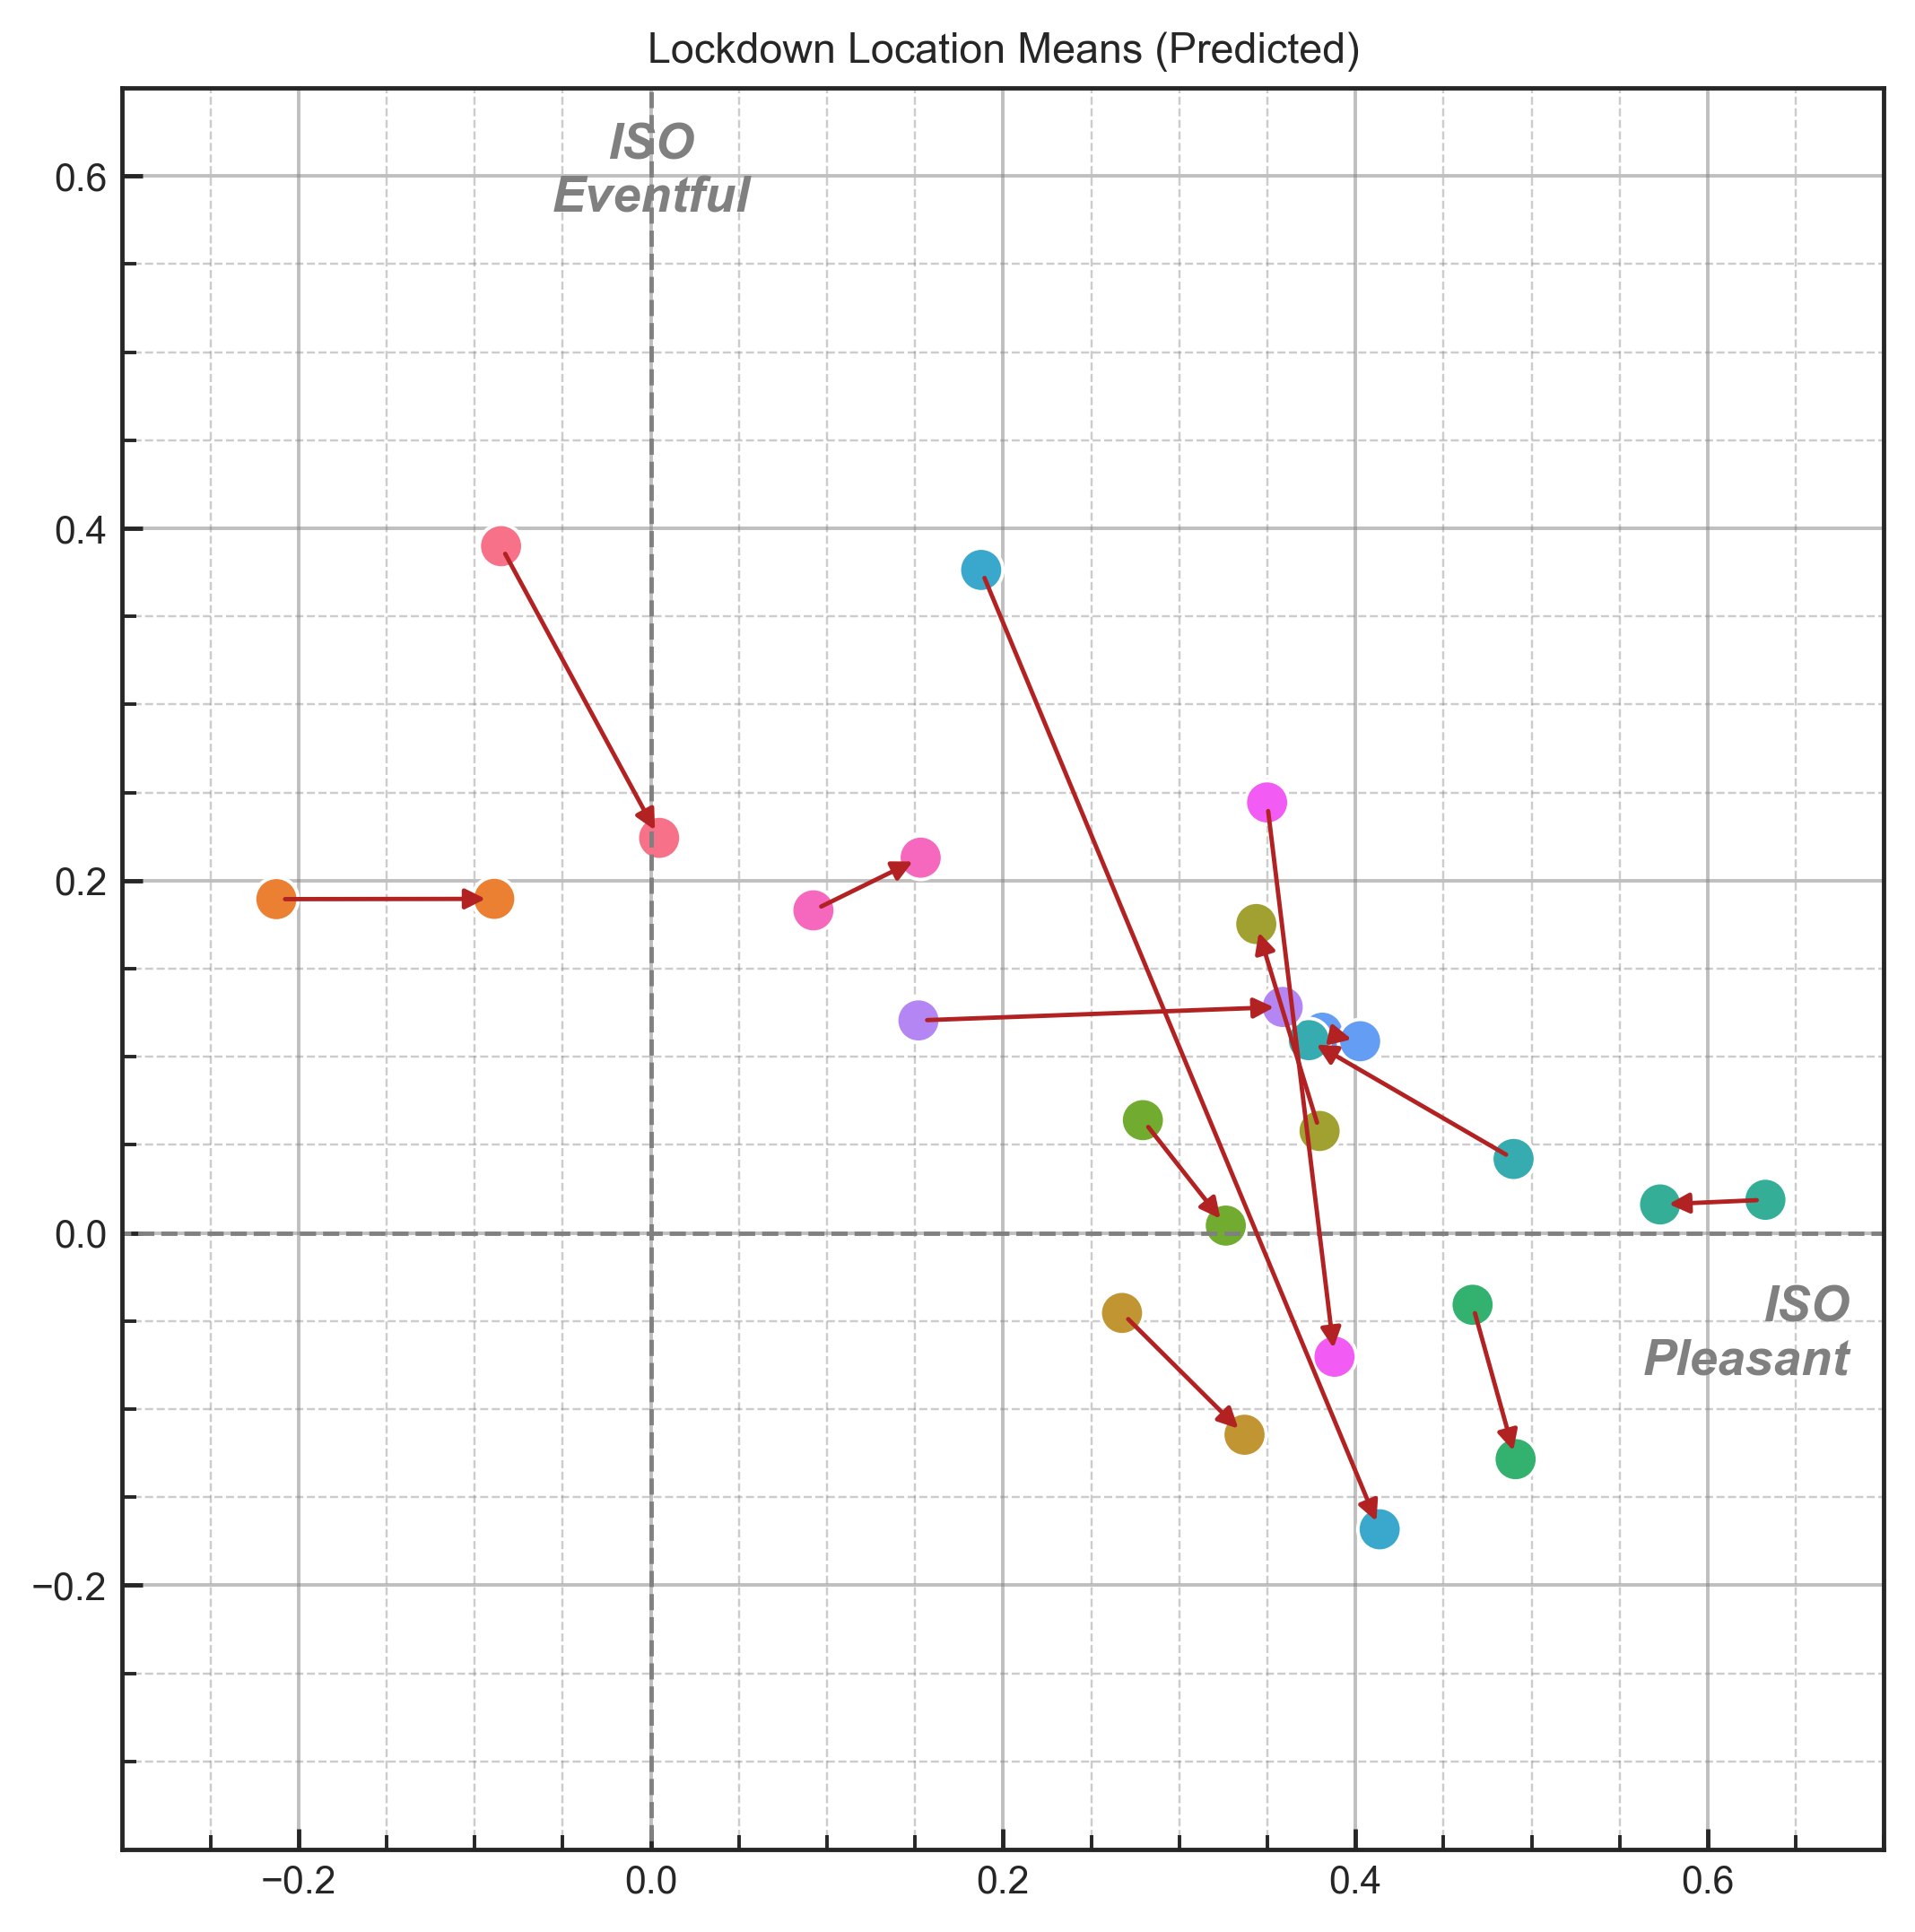

<Figure size 1200x800 with 0 Axes>

In [40]:
sns.set_context("paper")
sns.set_palette("Blues")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
fig = plt.figure(figsize=(12, 12))
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

line_weights = 1

axes = fig.add_subplot(221, aspect="equal", xlim=(-0.3, 0.7), ylim=(-0.35, 0.65))

axes.title.set_text('Lockdown Location Means (Predicted)')

sns.scatterplot(
    data=prelockdown_summary,
    x="Pleasant",
    y="Eventful",
    hue="LocationID",
    s=100,
    ax=axes,
    legend=False,
    palette=sns.color_palette('husl', 13)
)

sns.scatterplot(
    data=lockdown_summary,
    x="Pleasant",
    y="Eventful",
    hue="LocationID",
    s=100,
    ax=axes,
    legend=False,
    palette=sns.color_palette('husl', 13)
)
for i in range(len(lockdown_summary['LocationID'])):
    axes.annotate(
        text="",
        xy=(lockdown_summary['Pleasant'][i], lockdown_summary['Eventful'][i]),
        xytext=(prelockdown_summary['Pleasant'][i], prelockdown_summary['Eventful'][i]),
        arrowprops=dict(arrowstyle="-|>", color='firebrick', lw=line_weights),
    )



# grids and ticks
axes.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
axes.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

axes.grid(b=True, which="major", color="grey", alpha=0.5)
axes.grid(
    b=True,
    which="minor",
    color="grey",
    linestyle="dashed",
    linewidth=0.5,
    alpha=0.4,
)

# hide axis labels
axes.xaxis.label.set_visible(False)
axes.yaxis.label.set_visible(False)

# Add lines and labels for circumplex model
axes.plot(  # horizontal line
    [-1, 1],
    [0, 0],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
axes.plot(  # vertical line
    [0, 0],
    [1, -1],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
fontdict = {
    "fontstyle": "italic",
    "fontsize": "large",
    "fontweight": "bold",
    "c": "grey",
    "alpha": 1,
}

axes.text(  # ISO Pleasant label
    x=0.98,
    y=0.27,
    s="ISO\nPleasant",
    ha="right",
    fontdict=fontdict,
    transform=axes.transAxes,
)
axes.text(  # ISO Eventful label
    x=0.3,
    y=0.98,
    s="ISO\nEventful",
    ha="center",
    va="top",
    fontdict=fontdict,
    transform=axes.transAxes,
)


def iso_annotations(axes, loc_idx, x_adj=0, y_adj=0, ha="center"):
    axes.annotate(
        text=prelockdown_summary["LocationID"][loc_idx],
        xy=(prelockdown_summary["Pleasant"][loc_idx], prelockdown_summary["Eventful"][loc_idx]),
        xytext=(
            prelockdown_summary["Pleasant"][loc_idx] + x_adj,
            prelockdown_summary["Eventful"][loc_idx] + y_adj,
        ),
        ha=ha,
        arrowprops=dict(arrowstyle="-", ec="black"),
        annotation_clip=True,
    )

# iso_annotations(axes, 0, x_adj=-0, y_adj=0.08, ha="right")  # Camden Town
# iso_annotations(axes, 1, x_adj=-0, y_adj=-0.08, ha="center")  # Euston Tap
# iso_annotations(axes, 2, x_adj=-0, y_adj=-0.05, ha='right')  # Marchmont Garden
# iso_annotations(axes, 3, x_adj=0.03, y_adj=0.07, ha="left")  # MonumentoGaribaldi
# iso_annotations(axes, 4, x_adj=-0.02, y_adj=-0.05, ha="right")  # St Pancras Lock
# iso_annotations(axes, 5, x_adj=-0.02, y_adj=-0.08, ha="center")  # Regents Park Fields
# iso_annotations(axes, 6, x_adj=-0.03, y_adj=0.05, ha="center")  # Regents Park Japan
# iso_annotations(axes, 7, x_adj=-0.02, y_adj=-0.04, ha="right")  # Russell sq
# iso_annotations(axes, 8, x_adj=-0, y_adj=0.05, ha="right")  # SanMarco
# iso_annotations(axes, 9, x_adj=0.02, y_adj=0.07, ha='center')  # St Pauls Cross
# iso_annotations(axes, 10, x_adj=-0.02, y_adj=0.07, ha='left')  # St Pauls Row
# iso_annotations(axes, 11, x_adj=-0, y_adj=0.05, ha='right')  # Tate Modern
# iso_annotations(axes, 12, x_adj=-0, y_adj=0.05, ha='right')  # Torrington Sq

plt.tight_layout()
plt.show()
# plt.savefig('LockdownCircumplexMovement.jpg')


### Differences in soundscape assessments from Lockdown (During[Predicted] - Pre[Actual])

In [41]:
diff_summaries = pd.DataFrame(summaries.loc[summaries.Lockdown==1, "LocationID"])
diff_summaries["Pleasant_diff"]  = summaries.loc[summaries.Lockdown==2, "Pleasant"] - summaries.loc[summaries.Lockdown==1]["Pleasant"]
diff_summaries["Eventful_diff"]  = summaries.loc[summaries.Lockdown==2, "Eventful"] - summaries.loc[summaries.Lockdown==1]["Eventful"]
diff_summaries

,LocationID,Pleasant_diff,Eventful_diff
LocationID,,,
CamdenTown,CamdenTown,0.089724,-0.165594
EustonTap,EustonTap,0.123661,0.000158
MarchmontGarden,MarchmontGarden,0.069527,-0.069149
MonumentoGaribaldi,MonumentoGaribaldi,-0.035931,0.117467
PancrasLock,PancrasLock,0.047073,-0.059856
RegentsParkFields,RegentsParkFields,0.024417,-0.087633
RegentsParkJapan,RegentsParkJapan,-0.059766,-0.002633
RussellSq,RussellSq,-0.116216,0.067437
SanMarco,SanMarco,0.226202,-0.544597


In [42]:
distances = np.sqrt(diff_summaries['Pleasant_diff']**2 + diff_summaries['Eventful_diff']**2)
distances

LocationID
CamdenTown            0.188340
EustonTap             0.123661
MarchmontGarden       0.098059
MonumentoGaribaldi    0.122840
PancrasLock           0.076149
RegentsParkFields     0.090971
RegentsParkJapan      0.059824
RussellSq             0.134365
SanMarco              0.589706
StPaulsCross          0.022007
StPaulsRow            0.206909
TateModern            0.316944
TorringtonSq          0.067827
dtype: float64

I think, rather than a formal clustering analysis which doesn't seem terribly useful, we can instead create some reasonable groups of behaviour. If we look at the total distance moved, we can perhaps make three groups: 1) little movement (<0.1), 2) some movement (>0.1), 3) Very high movement (>0.3).

These groups are:

1) MarchmontGarden, PancrasLock, RegentsParkFields, RegentsParkJapan, StPaulsCross, TorringtonSq

2) CamdenTown, EustonTap, MonumentoGaribaldi, RussellSq, StPaulsRow

3) SanMarco, TateModern

Of groups 2 and 3, we can extract some further patterns regarding the direction of movement. CamdenTown and EustonTap show a Calm-direction movement, with increased pleasantness and decreased eventfulness.  MonumentoGaribaldi and RussellSq have a Chaotic-direction. StPaulsRow by contrast has a pretty strict Pleasant movement, with little change in the Eventfulness. 

MonumentoGaribaldi went Chaotic because of the presence of leafblowers during one of the lockdown sessions. RussellSq may have moved Chaotic for two reasons -> 1. the fountain was turned off, losing the energetic and positive masking of the water sounds, 2. decreased presence of people, with not as much decrease in noise levels.

SanMarco shows the greatest change by far, with a huge shift in the Calm-direction. It has moved so much that it has changed from the *most vibrant* to now the *most calm* location. 

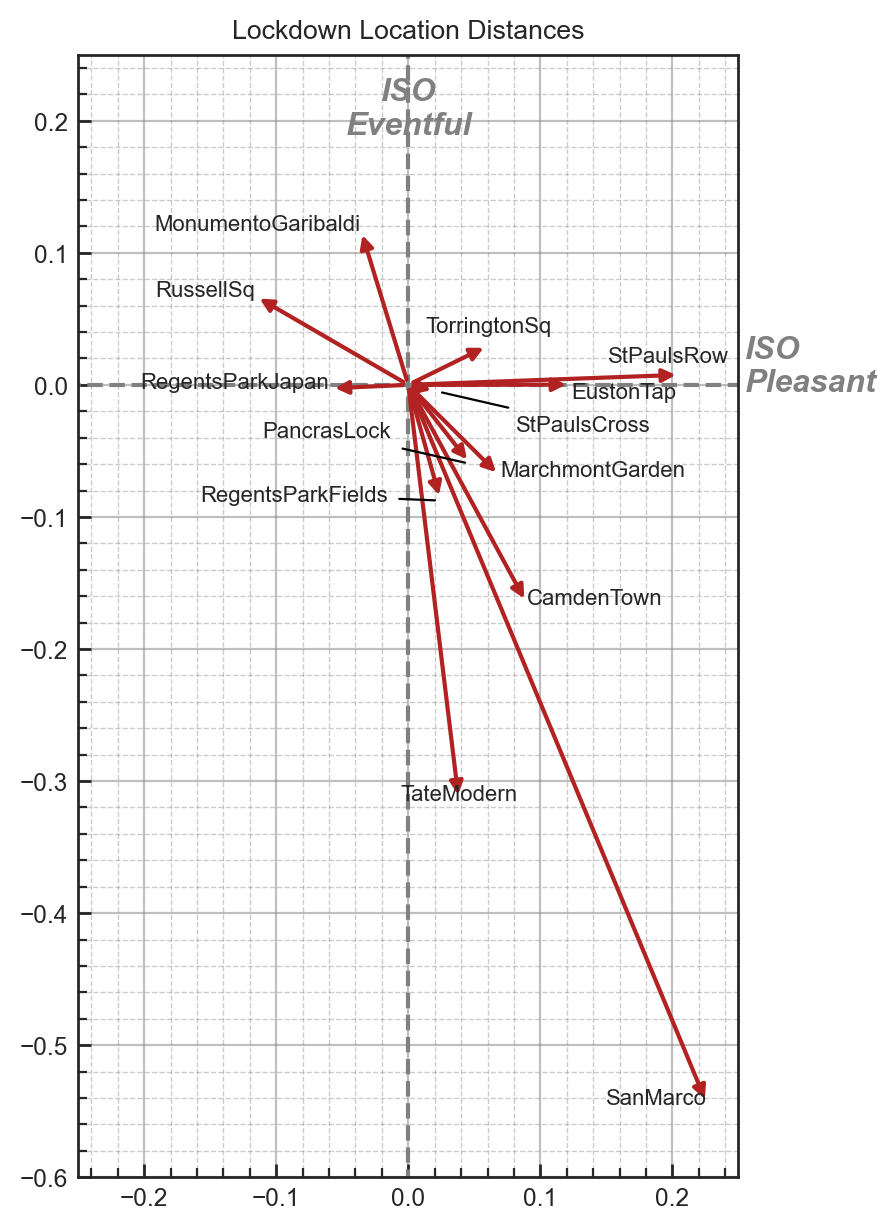

<Figure size 1200x800 with 0 Axes>

In [43]:
sns.set_context("paper")
sns.set_palette("Blues")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
fig = plt.figure(figsize=(12, 12))
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

line_weights = 1.5

ax = fig.add_subplot(221, aspect="equal", xlim=(-0.25, 0.25), ylim=(-0.6, 0.25))

ax.title.set_text('Lockdown Location Distances')

# sns.scatterplot(
#     data=diff_summaries,
#     x="Pleasant_diff",
#     y="Eventful_diff",
#     s=100,
#     ax=ax,
#     legend=False,
# )

for i in range(len(diff_summaries['LocationID'])):
    ax.annotate(
        text="",
        xy=(diff_summaries['Pleasant_diff'][i], diff_summaries['Eventful_diff'][i]),
        xytext=(0,0),
        arrowprops=dict(arrowstyle="-|>", color='firebrick', lw=line_weights),
    )

# grids and ticks
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

ax.grid(b=True, which="major", color="grey", alpha=0.5)
ax.grid(
    b=True,
    which="minor",
    color="grey",
    linestyle="dashed",
    linewidth=0.5,
    alpha=0.4,
)

# hide axis labels
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

# Add lines and labels for circumplex model
ax.plot(  # horizontal line
    [-1, 1],
    [0, 0],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
ax.plot(  # vertical line
    [0, 0],
    [1, -1],
    # transform=axes.transAxes,
    linestyle="dashed",
    color="grey",
    alpha=1,
    lw=line_weights
)
fontdict = {
    "fontstyle": "italic",
    "fontsize": "large",
    "fontweight": "bold",
    "c": "grey",
    "alpha": 1,
}

ax.text(  # ISO Pleasant label
    x=1.01,
    y=0.7,
    s="ISO\nPleasant",
    ha="left",
    fontdict=fontdict,
    transform=ax.transAxes,
)
ax.text(  # ISO Eventful label
    x=0.5,
    y=0.98,
    s="ISO\nEventful",
    ha="center",
    va="top",
    fontdict=fontdict,
    transform=ax.transAxes,
)


def iso_annotations(axes, loc_idx, x_adj=0, y_adj=0, ha="center", arrowprops=dict(arrowstyle="-", ec="black")):
    axes.annotate(
        text=diff_summaries["LocationID"][loc_idx],
        xy=(diff_summaries["Pleasant_diff"][loc_idx], diff_summaries["Eventful_diff"][loc_idx]),
        xytext=(
            diff_summaries["Pleasant_diff"][loc_idx] + x_adj,
            diff_summaries["Eventful_diff"][loc_idx] + y_adj,
        ),
        ha=ha,
        arrowprops=arrowprops,
        annotation_clip=False,
        fontsize="small"
    )

iso_annotations(ax, 0, x_adj=-0, y_adj=0, ha="left", arrowprops=None)  # Camden Town
iso_annotations(ax, 1, x_adj=-0, y_adj=-0.01, ha="left", arrowprops=None)  # Euston Tap
iso_annotations(ax, 2, x_adj=-0, y_adj=-0, ha='left', arrowprops=None)  # Marchmont Garden
iso_annotations(ax, 3, x_adj=0, y_adj=0, ha="right", arrowprops=None)  # MonumentoGaribaldi
iso_annotations(ax, 4, x_adj=-0.06, y_adj=0.02, ha="right")  # St Pancras Lock
iso_annotations(ax, 5, x_adj=-0.04, y_adj=-0, ha="right")  # Regents Park Fields
iso_annotations(ax, 6, x_adj=-0, y_adj=0, ha="right", arrowprops=None)  # Regents Park Japan
iso_annotations(ax, 7, x_adj=-0, y_adj=-0, ha="right", arrowprops=None)  # Russell sq
iso_annotations(ax, 8, x_adj=-0, y_adj=0, ha="right", arrowprops=None)  # SanMarco
iso_annotations(ax, 9, x_adj=0.06, y_adj=-0.03, ha='left')  # St Pauls Cross
iso_annotations(ax, 10, x_adj=-0.01, y_adj=0.01, ha='center', arrowprops=None)  # St Pauls Row
iso_annotations(ax, 11, x_adj=-0, y_adj=0, ha='center', arrowprops=None)  # Tate Modern
iso_annotations(ax, 12, x_adj=-0, y_adj=0.01, ha='center', arrowprops=None)  # Torrington Sq

plt.tight_layout()
plt.show()
# plt.savefig('LockdownLocationVectors.jpg')


### Rankings of degree of change for each soundscape assessment

In [44]:
diff_summaries.drop("LocationID", axis=1).abs().rank()

,Pleasant_diff,Eventful_diff
LocationID,,
CamdenTown,9.0,11.0
EustonTap,11.0,1.0
MarchmontGarden,8.0,8.0
MonumentoGaribaldi,3.0,10.0
PancrasLock,5.0,6.0
RegentsParkFields,2.0,9.0
RegentsParkJapan,6.0,2.0
RussellSq,10.0,7.0
SanMarco,13.0,13.0


In [45]:
from scipy.stats import ranksums
ranksums(prelockdownData.loc[prelockdownData.LocationID=="StPaulsCross", "Pleasant"], lockdownData.loc[lockdownData.LocationID=="StPaulsCross", "Pleasant"])

RanksumsResult(statistic=-6.902684899626334, pvalue=5.102873691987208e-12)

In [46]:
from scipy.stats import wilcoxon
# Are the actual and predicted values for the prelockdownData from the same sample? if p>0.05, yes
wilcoxon(prelockdownData["Pleasant"], prelockdownData["Pleasant_pred"])

WilcoxonResult(statistic=103752.0, pvalue=0.25052928034404)

In [47]:
from scipy.stats import mannwhitneyu
# Are the predicted values for the prelockdownData and lockdownData from the same sample? if p>0.05, yes
mannwhitneyu(prelockdownData["Pleasant_pred"], lockdownData["Pleasant_pred"])

MannwhitneyuResult(statistic=173420.0, pvalue=0.005299326147889168)